**Importing Libraries**

We will first need to import some of the common python modules used for handling the data, some machine learning metrics and models that are required to build and assess our predictive models, as well as modules for visualising our data.

In [27]:
import numpy as np # For arithmetics and arrays
import pandas as pd # For handling data frames

from sklearn.model_selection import train_test_split # Import train_test_split function to easily split data into training and testing samples
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

import pickle # To save the trained model and then read it

import seaborn as sns # Create plots
sns.set(style="ticks")
import matplotlib.pyplot as plt # Create plots

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Reading the data


In [28]:
df = pd.read_csv('/train_set.csv')
test_df = pd.read_csv('/test_set.csv')
sample= pd.read_csv('/sample_submission.csv')

##Converting the data from object to string in order to effectively operate on it

In [29]:
df['text'] = df['text'].astype(str) # Convert the column "text" from object to a string in order to operate on it
df['lang_id'] = df['lang_id'].astype(str)

##Checking whether the target classes are balanced

A countplot show that the data is balanced and therefore no need for resampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


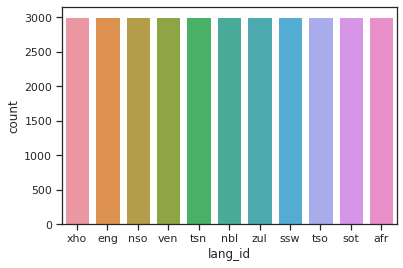

In [30]:
# Display target distribution
sns.countplot(df['lang_id'])
plt.show()

# Split the dataset into train & validation

In [31]:
# Split the dataset into train & validation (20%) for model training

# Seperate features and tagret variables
X = df['text']
y = df['lang_id']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

## Pipelines

The pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers. 

The TFIDF vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [32]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

## Training the models
The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [33]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Logistic regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

# Model evaluation
The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:
- Classification report 
- Confusion matrix

The best model will be selected based on the weighted F1 score. 

#Random Forest

Accuracy of the Random Forest Model on the test set = 90.74%


Text(0.5, 1.0, 'Random Forest Model Accuracy Score = 90.74%')

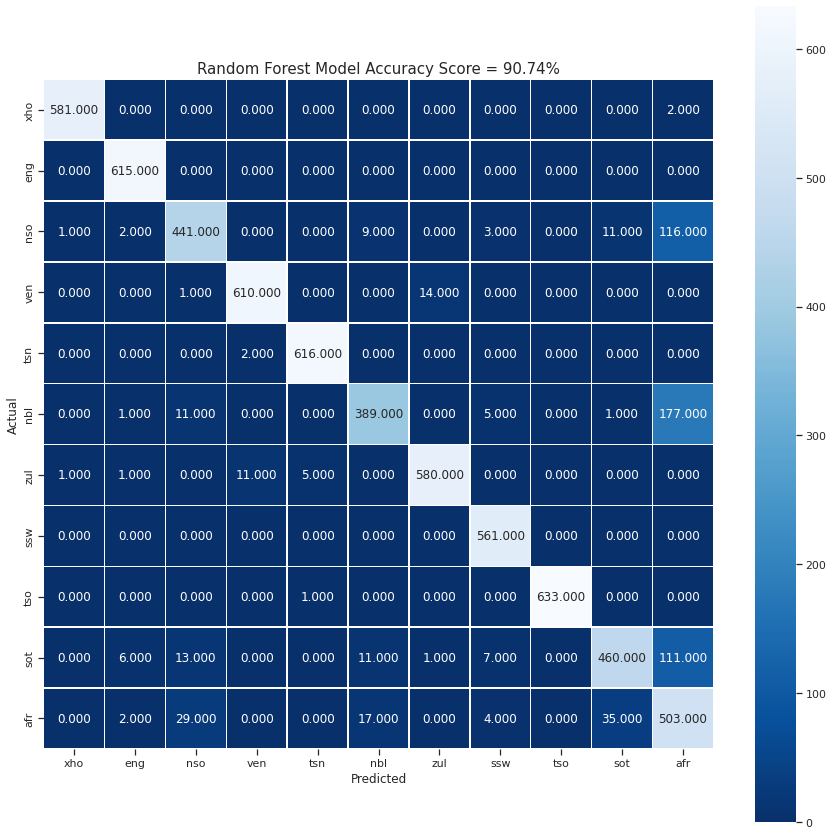

In [34]:
# Calculate accuracy of the Random Forest Model
accuracy_score_rf = accuracy_score(y_valid, y_pred_rf)
print('Accuracy of the Random Forest Model on the test set = ' + str(round(accuracy_score_rf*100,2)) +"%" )

labels = df['lang_id'].unique()
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_rf = confusion_matrix(y_valid, y_pred_rf) #labels)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Random Forest Model Accuracy Score = '+ str(round(accuracy_score_rf*100,2)) +"%"
plt.title(title, size = 15)

In [35]:
print('Random Forest Output:')
print(classification_report(y_valid,y_pred_rf))

Random Forest Output:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.98      1.00      0.99       615
         nbl       0.89      0.76      0.82       583
         nso       0.98      0.98      0.98       625
         sot       0.99      1.00      0.99       618
         ssw       0.91      0.67      0.77       584
         tsn       0.97      0.97      0.97       598
         tso       0.97      1.00      0.98       561
         ven       1.00      1.00      1.00       634
         xho       0.91      0.76      0.82       609
         zul       0.55      0.85      0.67       590

    accuracy                           0.91      6600
   macro avg       0.92      0.91      0.91      6600
weighted avg       0.92      0.91      0.91      6600



#Naive Bayes classification

Accuracy of the Naive Bayes Model on the test set = 99.8%


Text(0.5, 1.0, 'Naive Bayes Model Accuracy Score = 99.8%')

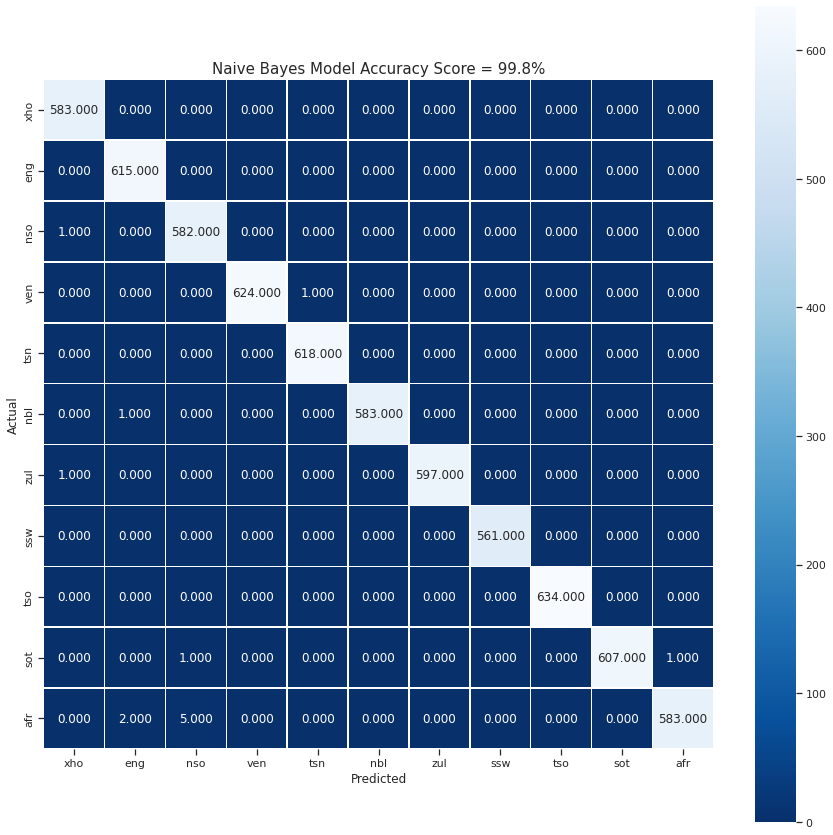

In [36]:
# Calculate accuracy of the Naive Bayes Model
accuracy_score_nb = accuracy_score(y_valid, y_pred_nb)
print('Accuracy of the Naive Bayes Model on the test set = ' + str(round(accuracy_score_nb*100,2)) +"%" )

labels = df['lang_id'].unique()
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_nb = confusion_matrix(y_valid, y_pred_nb) #labels)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_nb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Naive Bayes Model Accuracy Score = '+ str(round(accuracy_score_nb*100,2)) +"%"
plt.title(title, size = 15)

In [37]:
print('Naive Bayes Model Output:')
print(classification_report(y_valid,y_pred_nb))

Naive Bayes Model Output:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



#K-NN Classifier



Accuracy of the K-NN Classifier Model on the test set = 95.98%


Text(0.5, 1.0, 'K-NN Classifier Model Accuracy Score = 95.98%')

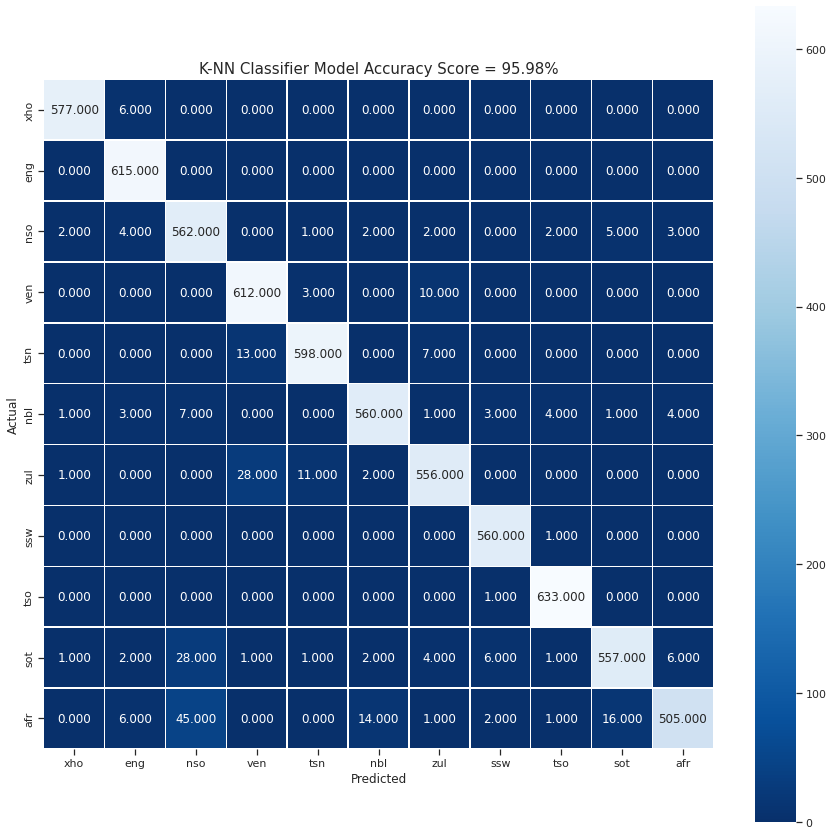

In [38]:
# Calculate accuracy of the K-NN Classifier Model
accuracy_score_knn = accuracy_score(y_valid, y_pred_knn)
print('Accuracy of the K-NN Classifier Model on the test set = ' + str(round(accuracy_score_knn*100,2)) +"%" )

labels = df['lang_id'].unique()
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_knn = confusion_matrix(y_valid, y_pred_knn) #labels)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'K-NN Classifier Model Accuracy Score = '+ str(round(accuracy_score_knn*100,2)) +"%"
plt.title(title, size = 15)

In [39]:
print('K-NN Model Output:')
print(classification_report(y_valid,y_pred_knn))

K-NN Model Output:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.97      1.00      0.98       615
         nbl       0.88      0.96      0.92       583
         nso       0.94      0.98      0.96       625
         sot       0.97      0.97      0.97       618
         ssw       0.97      0.96      0.96       584
         tsn       0.96      0.93      0.94       598
         tso       0.98      1.00      0.99       561
         ven       0.99      1.00      0.99       634
         xho       0.96      0.91      0.94       609
         zul       0.97      0.86      0.91       590

    accuracy                           0.96      6600
   macro avg       0.96      0.96      0.96      6600
weighted avg       0.96      0.96      0.96      6600



#Logistic regression

Accuracy of the Logistic regression Model on the test set = 99.47%


Text(0.5, 1.0, 'Logistic regression Model Accuracy Score = 99.47%')

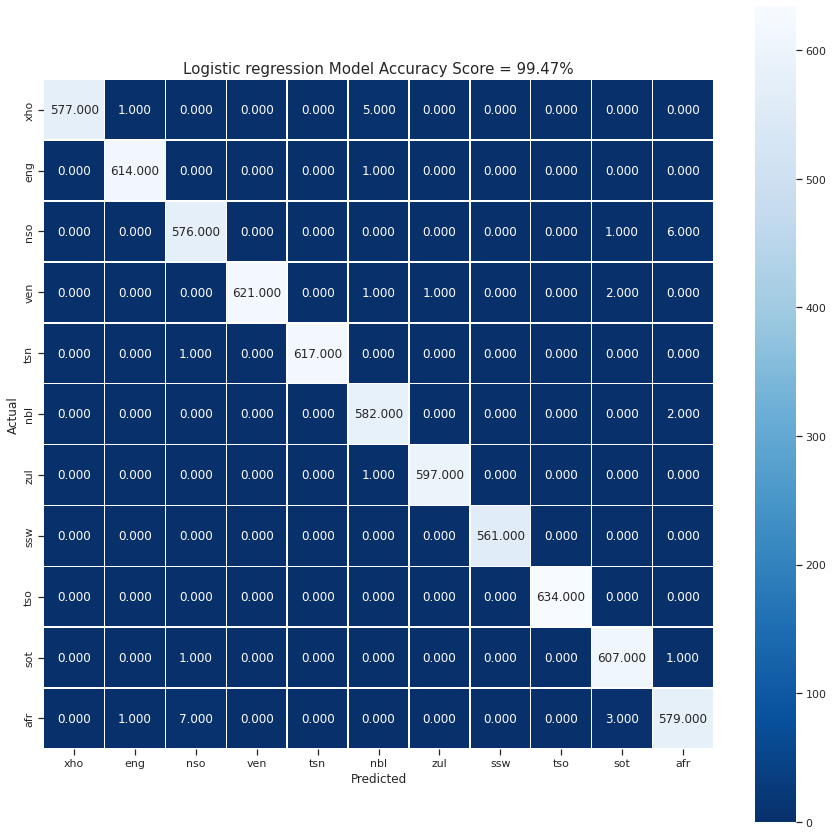

In [40]:
# Calculate accuracy of the Logistic regression Model
accuracy_score_lr = accuracy_score(y_valid, y_pred_lr)
print('Accuracy of the Logistic regression Model on the test set = ' + str(round(accuracy_score_lr*100,2)) +"%" )

labels = df['lang_id'].unique()
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_lr = confusion_matrix(y_valid, y_pred_lr) #labels)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Logistic regression Model Accuracy Score = '+ str(round(accuracy_score_lr*100,2)) +"%"
plt.title(title, size = 15)

In [41]:
print('Logistic Regression Model Output:')
print(classification_report(y_valid,y_pred_lr))

Logistic Regression Model Output:
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



#Linear SVC

Accuracy of the Linear SVC Model on the test set = 99.71%


Text(0.5, 1.0, 'Random Linear SVC Accuracy Score = 99.71%')

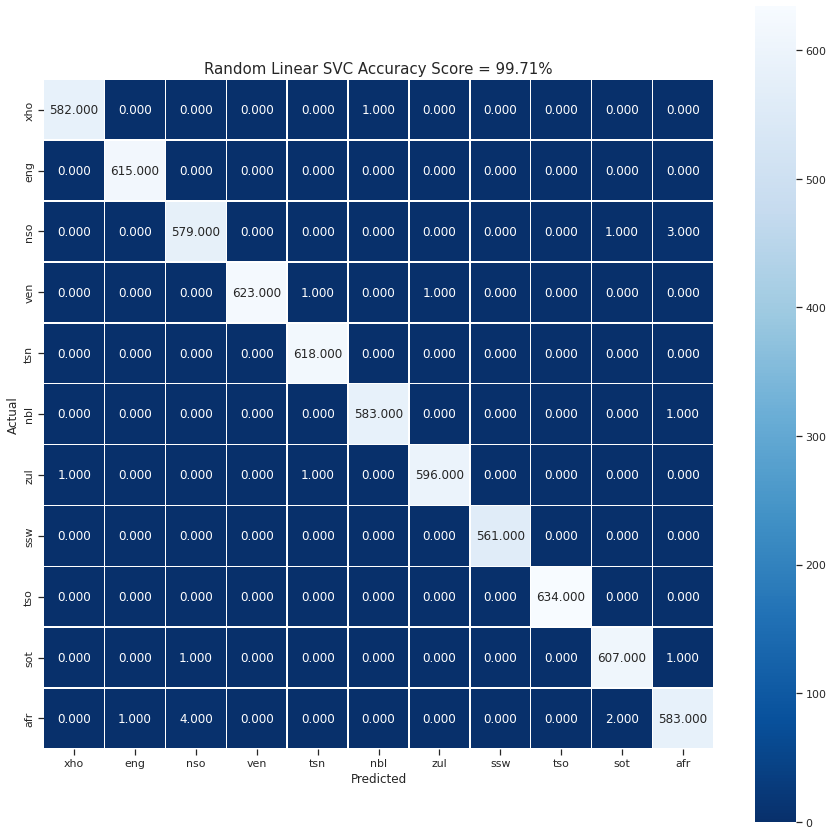

In [42]:
# Calculate accuracy of the Linear SVC Model
accuracy_score_lsvc = accuracy_score(y_valid, y_pred_lsvc)
print('Accuracy of the Linear SVC Model on the test set = ' + str(round(accuracy_score_lsvc*100,2)) +"%" )

labels = df['lang_id'].unique()
# Confusion Matrix is often used to describe the performance of a classification model 
cm_Model_lsvc = confusion_matrix(y_valid, y_pred_lsvc) #labels)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
sns.heatmap(cm_Model_lsvc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
title = 'Random Linear SVC Accuracy Score = '+ str(round(accuracy_score_lsvc*100,2)) +"%"
plt.title(title, size = 15)

In [43]:
print('Linear SVC Model Output:')
print(classification_report(y_valid,y_pred_lsvc))

Linear SVC Model Output:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



#Selecting the best model

##Based on the f1-score, the Naive Bayes performs better than the other models.

The Naive Bayes model is used in making prediction on the test dataset


In [46]:
y_test = nb.predict(test_df['text'])
output = pd.DataFrame({'index': test_df['index'],
                       'lang_id': y_test})
output.to_csv('new_submission.csv', index=False)
output

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
